# Notebook to reproduce _Supplementary Figure 10_

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_10/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [3]:
SPECIES_OI = 'Human'
organs = ['Brain', 'Cerebellum', 'Heart', 'Kidney', 'Liver', 'Ovary', 'Testis']

In [4]:
def get_performance_by_organ(org, row):
    n = 0
    keyname = '{}:{}'.format(SPECIES_OI, org)
    if keyname not in row:
        warning.warn('Missing {}'.format(keyname))
        return None
    return row[keyname]

In [12]:
def plot_EvoDevo_extrapolation_model_human_performance(metric):
    means = []
    stderrs = []
    points = []
    df = pd.read_csv('results/EvoDevo/early_EvoDevo_model_performance:{}.csv'.format(metric))

    ax = plot_settings.get_wider_axis()
    model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
    colors = [plot_settings.get_model_colors(mod) for mod in model_ordering]
    labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]

    for model in model_ordering:
        perf = []
        row = df[df['model'] == model].iloc[0]
        for org in organs:
            perf.append(get_performance_by_organ(org, row))
        means.append(np.mean(perf))
        stderrs.append(np.std(perf))
        points.append(perf)

    plot_utils.grouped_barplot(
        ax, [means], [''],
        xlabel='', ylabel=plot_settings.get_metric_name(metric), color_legend=labels,
        nested_color=colors, nested_errs=[stderrs], tickloc_top=False, rotangle=45, anchorpoint='right',
        legend_loc='upper left' if metric == 'RMSE' else 'upper right',
        min_val=0.0 if 'time' not in metric else -0.2)
    
    plot_utils.overlay_grouped_dot_plot(ax, [points], size=7.5, alpha=0.5, color='#4292c6')

    plot_utils.format_ax(ax)
    plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper right', 
                             ncols=2)
    plot_utils.put_legend_outside_plot(ax, anchorage=(1.01, 1.01))
    plt.tight_layout()

## Produce supplementary figure 10a-c

Supplementary Fig. 10a

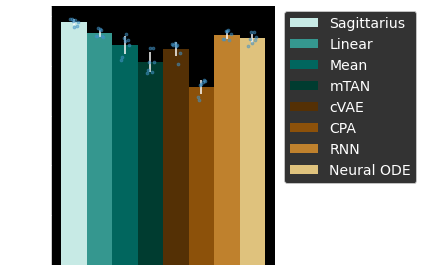

In [13]:
%matplotlib inline

plot_EvoDevo_extrapolation_model_human_performance('pearson_compare_genes')
plt.savefig(fig_dir + 'figure_10a.pdf')

Supplementary Fig. 10b

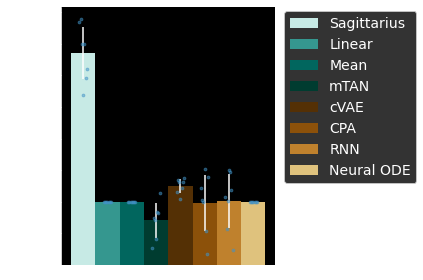

In [14]:
%matplotlib inline

plot_EvoDevo_extrapolation_model_human_performance('pearson_compare_times')
plt.savefig(fig_dir + 'figure_10b.pdf')

Supplementary Fig. 10c

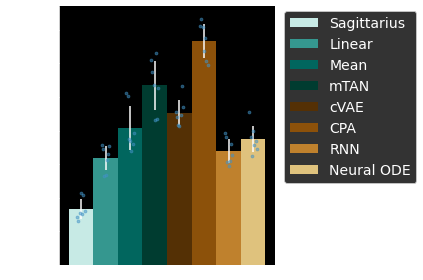

In [15]:
%matplotlib inline

plot_EvoDevo_extrapolation_model_human_performance('RMSE')
plt.savefig(fig_dir + 'figure_10c.pdf')